In [1]:
from tqdm.notebook import tqdm

import era5
from era5.model import FourierRegression, evaluate_ft

%matplotlib inline

In [2]:
variable = era5.WindSpeed()

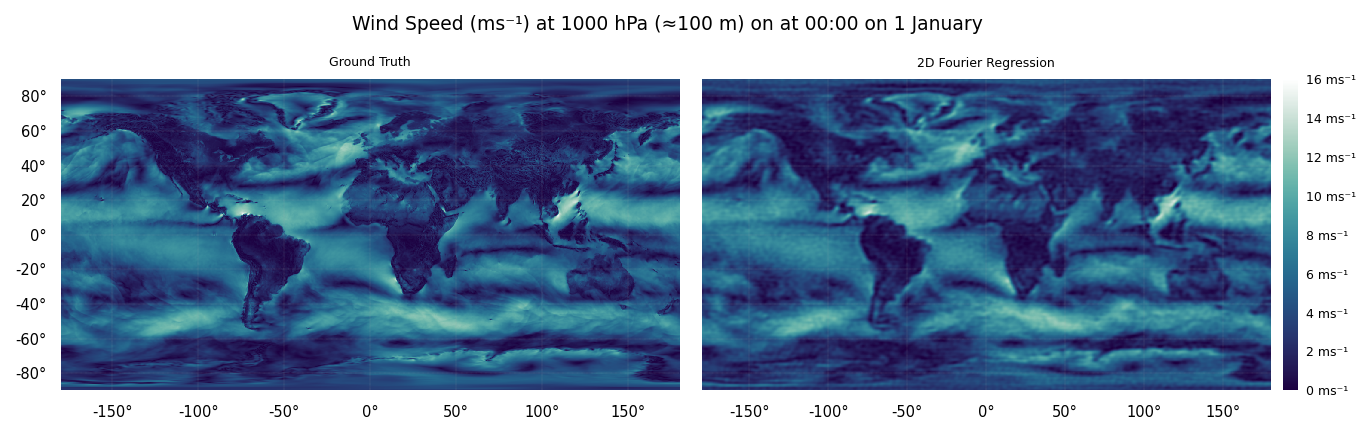


        Fourier Regression 2D:
            Data stdev: 2.6196 ms⁻¹
            MAE: 0.3099 ms⁻¹
            RMSE: 0.4623 ms⁻¹
            
            Input size: 1.98 MiBs
            Model size: 20.35 KiBs
            Size Ratio: 1.00%
            
            Frequencies: 9563
            Original size: 423.52 GiBs
            Compressed size: 4.25 GiBs
        


In [5]:
idx = ["TAVG-01-01 00:00", 1000]
model = FourierRegression(variable, idx, quantile=0.99)
model.fft()

fig = era5.MetFigure(cols=2, sharey=True, sharex=True)

plot = era5.plot(variable, idx, axes=fig[0])
plot.plot(colorbar=False)
plot.set_ax_title("Ground Truth")

plot = era5.plot(variable, idx, axes=fig[1])
plot.plot(model.predict())
plot.set_ax_title("2D Fourier Regression")

plot.show()
model.describe()

In [7]:
time = "TAVG-01-01 00:00"
models = [FourierRegression(variable, [time, lev], quantile=0.99) for lev in tqdm(variable[time]["level"])]

_ = evaluate_ft(models)

  0%|          | 0/25 [00:00<?, ?it/s]


    Data stdev: 9.1880 ms⁻¹
    Data range: 0.000 to 81.405 ms⁻¹ (81.4046 ms⁻¹)
    
    R: 0.9992
    R²: 0.9985
    MAE: 0.2414 ms⁻¹
    RMSE: 0.3580 ms⁻¹
    
    MAPE: 309.518%
    wMAPE: 2.533%
    SMAPE: 3.395%
    
    Original size: 423.52 GiBs
    Compressed size: 4.24 GiBs
    
